<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [5]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip')

In [6]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
df['categories'].nunique()

60

In [8]:
def lemmatize(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [9]:
df['lemmas'] = df['reviews.text'].apply(lemmatize)

In [10]:
df['lemmas'].head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [bulk, expensive, way, product, like]
2                             [Duracell, price, happy]
3                  [work, brand, battery, well, price]
4                  [battery, long, last, price, great]
Name: lemmas, dtype: object

In [11]:
id2word = corpora.Dictionary(df['lemmas'])

In [12]:
id2word.filter_extremes(no_below=5, no_above=0.95)

In [13]:
len(id2word.keys())

3082

In [14]:
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [15]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics = 9,
                   passes=10,
                   workers=4
                  )

In [16]:
lda.print_topics()

[(0,
  '0.049*"love" + 0.044*"buy" + 0.038*"old" + 0.035*"year" + 0.015*"Kindle" + 0.014*"purchase" + 0.014*"get" + 0.013*"kindle" + 0.010*"2" + 0.010*"Fire"'),
 (1,
  '0.039*"easy" + 0.038*"read" + 0.031*"use" + 0.027*"book" + 0.027*"Kindle" + 0.024*"screen" + 0.019*"size" + 0.019*"like" + 0.018*"light" + 0.016*"great"'),
 (2,
  '0.065*"game" + 0.046*"love" + 0.046*"app" + 0.039*"kid" + 0.037*"play" + 0.029*"book" + 0.024*"watch" + 0.019*"great" + 0.019*"read" + 0.018*"movie"'),
 (3,
  '0.021*"time" + 0.017*"thing" + 0.016*"like" + 0.016*"device" + 0.015*"set" + 0.013*"app" + 0.011*"Alexa" + 0.011*"kid" + 0.011*"use" + 0.011*"limit"'),
 (4,
  '0.185*"work" + 0.038*"good" + 0.037*"buy" + 0.031*"far" + 0.031*"great" + 0.026*"purchase" + 0.026*"fine" + 0.024*"expect" + 0.023*"thank" + 0.021*"happy"'),
 (5,
  '0.070*"tablet" + 0.026*"great" + 0.026*"Amazon" + 0.023*"good" + 0.018*"app" + 0.015*"price" + 0.014*"Fire" + 0.013*"screen" + 0.013*"use" + 0.009*"fire"'),
 (6,
  '0.126*"great" + 

In [17]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [18]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
love buy old year Kindle

------ Topic 1 ------
easy read use book Kindle

------ Topic 2 ------
game love app kid play

------ Topic 3 ------
time thing like device set

------ Topic 4 ------
work good buy far great

------ Topic 5 ------
tablet great Amazon good app

------ Topic 6 ------
great price good battery product

------ Topic 7 ------
tablet love kid use great

------ Topic 8 ------
battery long brand buy Amazon



In [19]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [20]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.154093  0.148123       1        1  19.843847
5     -0.017112  0.031632       2        1  13.558920
1     -0.090920  0.030952       3        1  12.413817
7     -0.143525 -0.180878       4        1  11.734947
6      0.265855 -0.034164       5        1  11.701497
0     -0.128582 -0.014794       6        1   9.945230
3     -0.097246  0.164636       7        1   7.761835
2     -0.182248 -0.029949       8        1   7.661074
4      0.239683 -0.115558       9        1   5.378825, topic_info=         Term         Freq        Total Category  logprob  loglift
10       work  4504.000000  4504.000000  Default  30.0000  30.0000
3     battery  9003.000000  9003.000000  Default  29.0000  29.0000
2069   tablet  7184.000000  7184.000000  Default  28.0000  28.0000
18      price  5093.000000  5093.000000  Default  27.0000  27.0000
21      great  9164.000000  9164.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
13       like   202.766937  2869.627197   Topic9  -4.4328   0.2728
3     battery   294.305267  9003.381836   Topic9  -4.0602  -0.4980
18      price   229.663528  5093.989746   Topic9  -4.3082  -0.1765
150      time   126.007835  2506.821533   Topic9  -4.9085  -0.0677
44    perfect    91.536385  1086.420776   Topic9  -5.2281   0.4488

[685 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2394      2  0.820503     $
2394      3  0.036199     $
2394      4  0.002413     $
2394      6  0.137555     $
2394      7  0.002413     $
...     ...       ...   ...
1085      4  0.299646    yr
1085      6  0.627637    yr
1085      7  0.064788    yr
1085      8  0.004049    yr
1319      4  0.933821  zone

[1825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 2, 8, 7, 1, 4, 3, 5])

In [21]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,9)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [22]:
df2 = pd.DataFrame.from_records(new_distro)
df2.columns = topics
df2['category'] = df['primaryCategories']

In [23]:
df2.head()

,love buy old year Kindle,easy read use book Kindle,game love app kid play,time thing like device set,work good buy far great,tablet great Amazon good app,great price good battery product,tablet love kid use great,battery long brand buy Amazon,category
0,0.197810,0.000000,0.000000,0.000000,0.103750,0.000000,0.000000,0.000000,0.642842,Health & Beauty
1,0.018525,0.018534,0.018524,0.018531,0.018529,0.018526,0.412543,0.018525,0.457763,Health & Beauty
2,0.027782,0.027784,0.027779,0.027780,0.284948,0.027784,0.293526,0.027783,0.254834,Health & Beauty
3,0.018520,0.018521,0.018519,0.018519,0.018554,0.018523,0.851796,0.018519,0.018529,Health & Beauty
4,0.018519,0.018519,0.018520,0.018519,0.018521,0.018520,0.851817,0.018520,0.018545,Health & Beauty


In [24]:
df2.groupby('category').mean()

,love buy old year Kindle,easy read use book Kindle,game love app kid play,time thing like device set,work good buy far great,tablet great Amazon good app,great price good battery product,tablet love kid use great,battery long brand buy Amazon
category,,,,,,,,,
Animals & Pet Supplies,0.124770,0.281369,0.010191,0.010191,0.032170,0.010191,0.426813,0.010192,0.063909
Electronics,0.119064,0.153915,0.099976,0.077149,0.053829,0.163540,0.083071,0.197818,0.035273
"Electronics,Furniture",0.000000,0.000000,0.000000,0.584289,0.000000,0.101058,0.000000,0.178667,0.090885
"Electronics,Media",0.079641,0.601133,0.029135,0.036731,0.027267,0.038381,0.053889,0.028092,0.087954
Health & Beauty,0.033431,0.032309,0.028007,0.033841,0.139346,0.028352,0.349979,0.035511,0.310437
Home & Garden,0.215548,0.283284,0.033343,0.033341,0.180766,0.033368,0.033343,0.033348,0.153659
Office Supplies,0.097811,0.023522,0.048223,0.023516,0.348818,0.161812,0.249261,0.023522,0.023514
"Office Supplies,Electronics",0.092175,0.433120,0.057311,0.043447,0.055874,0.092888,0.087274,0.075143,0.046362
"Toys & Games,Electronics",0.143195,0.043559,0.167784,0.085827,0.033796,0.058479,0.053987,0.366155,0.029934


In [25]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [26]:
import warnings; warnings.simplefilter('ignore')

coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [27]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [28]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-2.360294
1,0,8,-2.468615
2,0,14,-2.473683
3,0,20,-2.622199
4,0,26,-2.715874


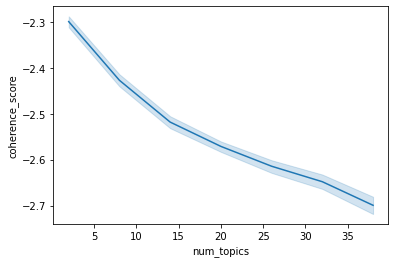

In [29]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling